Retrieving SummaryDoc documents:   0%|          | 0/802 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/63 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1149 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/71 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/655 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/17 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/612 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/47 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/319 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/64 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/482 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/51 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/959 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/44 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/488 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/72 [00:00<?, ?it/s]

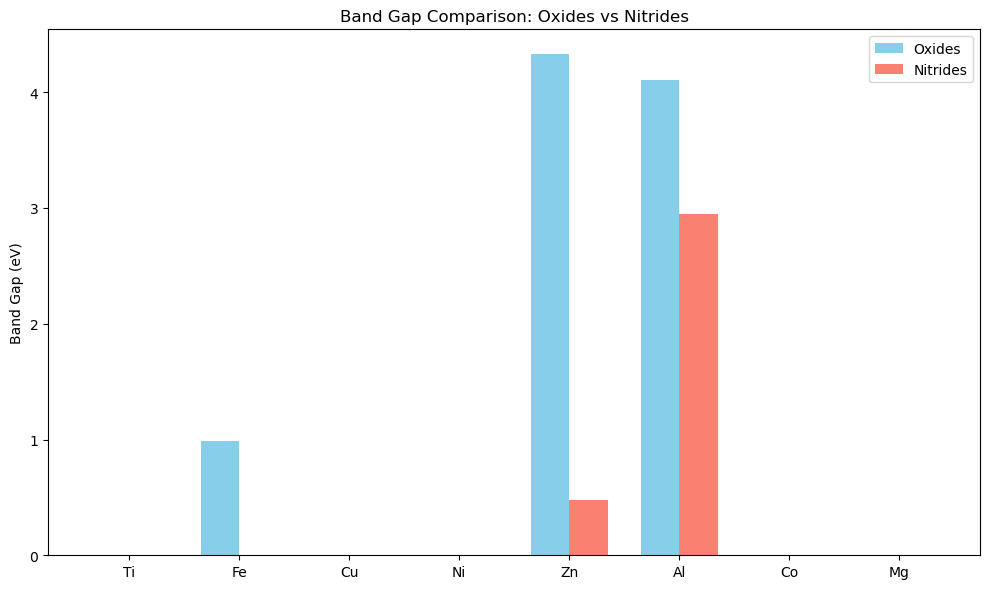

In [1]:
#1.1
from mp_api.client import MPRester
import matplotlib.pyplot as plt

API_KEY = "XXXXXXXXXXXXXXXXXXXXX"

metals = ["Ti", "Fe", "Cu", "Ni", "Zn", "Al", "Co", "Mg"]
oxide_gaps = []
nitride_gaps = []

with MPRester(API_KEY) as mpr:
    for metal in metals:
        # Oxide: metal + O, exclude N
        oxides = mpr.materials.summary.search(
            elements=[metal, "O"],
            exclude_elements=["N"],
            num_elements=(2, 3),
            band_gap=(0, 10),  # narrow search to real compounds
            energy_above_hull=(0, 0.1),  # stable or nearly stable
        )
        oxide_gap = oxides[0].band_gap if oxides else None
        oxide_gaps.append(oxide_gap)

        # Nitride: metal + N, exclude O
        nitrides = mpr.materials.summary.search(
            elements=[metal, "N"],
            exclude_elements=["O"],
            num_elements=(2, 3),
            band_gap=(0, 10),
            energy_above_hull=(0, 0.1),
        )
        nitride_gap = nitrides[0].band_gap if nitrides else None
        nitride_gaps.append(nitride_gap)

# Plotting
x = range(len(metals))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], oxide_gaps, width=width, label="Oxides", color="skyblue")
plt.bar([i + width/2 for i in x], nitride_gaps, width=width, label="Nitrides", color="salmon")

plt.xticks(x, metals)
plt.ylabel("Band Gap (eV)")
plt.title("Band Gap Comparison: Oxides vs Nitrides")
plt.legend()
plt.tight_layout()
plt.show()

Retrieving SummaryDoc documents:   0%|          | 0/124 [00:00<?, ?it/s]

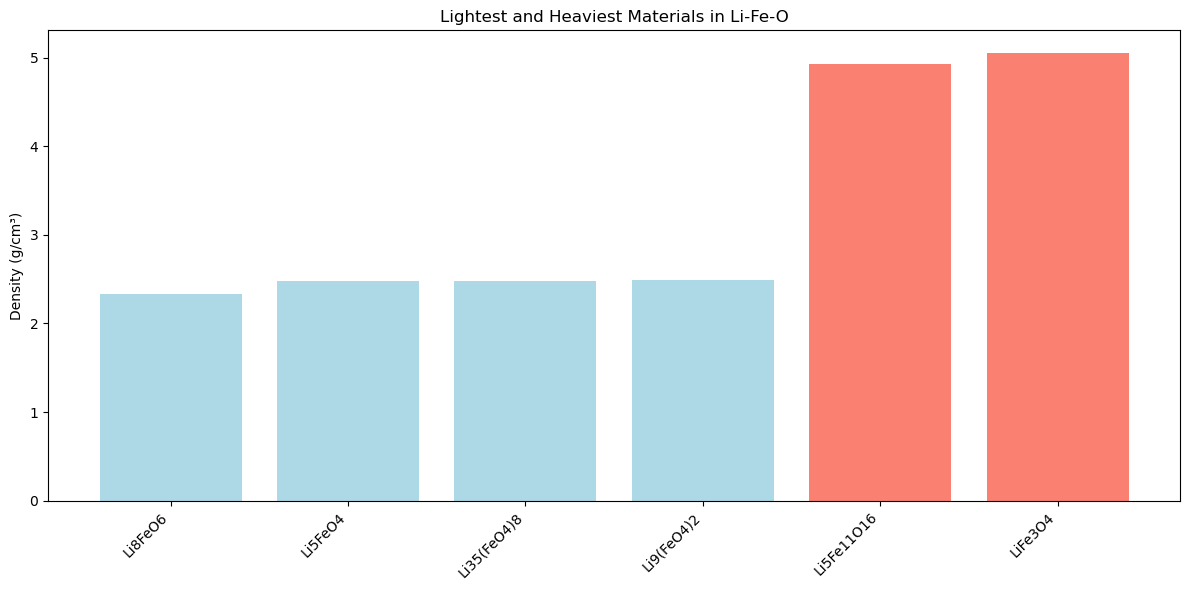